In [1]:
import pandas as pd

In [2]:
filepath = 'C:/glassdoorReviews/'


In [3]:
df = pd.read_csv(filepath + 'accentureGlassdoorReviews.csv')

In [4]:
df.head()

,Unnamed: 0,date,reviewNo,employeeType,position,summary,pro,con,advice,overallStar,reviewLink
0,1,15 May 2018,empReview_20603900,Current Employee - Applications Development An...,I have been working at Accenture full-time (Mo...,"Almost, the best place to work",Pros and Cons are solely dependent on project ...,1) Not all people who deserves promotion gets ...,If a permanent psychologist is available at th...,5.0,https://www.glassdoor.com/Reviews/Accenture-Re...
1,2,25 Nov 2015,empReview_8746632,Current Employee - Software Engineering Analyst,I have been working at Accenture full-time (Mo...,Balanced Company,Good CompanyFree TransportTImely Promotion if ...,Stupid merciless/heartless manager who always ...,Please favour all employees not just managers ...,4.0,https://www.glassdoor.com/Reviews/Accenture-Re...
2,3,15 May 2018,empReview_20587606,Former Employee - Senior Associate,I worked at Accenture full-time (More than a y...,Work environment,All the people are very helping.,All is good no cons.,Nothibg,5.0,https://www.glassdoor.com/Reviews/Accenture-Re...
3,4,15 May 2018,empReview_20587923,Current Employee - Applications Developer,I have been working at Accenture full-time (Mo...,Fusion middleware developer. : technologies li...,"Great Environment, Good projects. Good management",Not really any cons. it is best to work here .,Very flexible and good keep it up,5.0,https://www.glassdoor.com/Reviews/Accenture-Re...
4,5,15 May 2018,empReview_20591406,Former Employee - Associate Software Engineer,I worked at Accenture full-time (More than a y...,Work depends on the Project,1.Infrastructure2.Health Environment3.Good cli...,1.Fresher Dont have rights to choose the strea...,HR should have frequent meeting with their tea...,4.0,https://www.glassdoor.com/Reviews/Accenture-Re...


In [5]:
df.tail()

,Unnamed: 0,date,reviewNo,employeeType,position,summary,pro,con,advice,overallStar,reviewLink
985,986,13 Jan 2018,empReview_18715096,Current Employee - Team Lead,I have been working at Accenture full-time (Mo...,Excellent company,"Excellent company to work with, good work bala...",Excellent company there are no purticular cons.,Excellent company,5.0,https://www.glassdoor.com/Reviews/Accenture-Re...
986,987,28 Jan 2018,empReview_18959368,Former Employee - Applications Development Ass...,I worked at Accenture full-time (More than a y...,Bad for Freshers,Good inclusive culture.Awesome workplace and c...,Not good for freshersvery less opportunities t...,None,2.0,https://www.glassdoor.com/Reviews/Accenture-Re...
987,988,13 Jan 2018,empReview_18715243,Current Employee - Senior Software Engineer,I have been working at Accenture full-time (Le...,Good place to work,Big organization so you get a lot of projects.,Depend upon projects assigned to you.,You are doing good job,4.0,https://www.glassdoor.com/Reviews/Accenture-Re...
988,989,13 Jan 2018,empReview_18717957,Current Employee - Associate Manager,I have been working at Accenture full-time (Mo...,Fine company,Good learning opportunitiesFlexibility based o...,Limited opportunities in Mumbai for Oracle App...,Reward the work and contributions and not the ...,4.0,https://www.glassdoor.com/Reviews/Accenture-Re...
989,990,27 Jan 2018,empReview_18941500,Former Employee - Anonymous Employee,I worked at Accenture full-time (More than a y...,Software Engineer,Good work environment...Good peers....onsite o...,no cons ...just do your best,None,3.0,https://www.glassdoor.com/Reviews/Accenture-Re...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 11 columns):
Unnamed: 0      990 non-null int64
date            990 non-null object
reviewNo        990 non-null object
employeeType    990 non-null object
position        990 non-null object
summary         989 non-null object
pro             990 non-null object
con             990 non-null object
advice          990 non-null object
overallStar     990 non-null float64
reviewLink      990 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 85.2+ KB


In [26]:
df['advice'].fillna('None', inplace=True)

In [7]:
df.iloc[73]

Unnamed: 0                                                     74
date                                                   1 May 2018
reviewNo                                       empReview_20394148
employeeType              Current Employee - Applications Analyst
position        I have been working at Accenture full-time (Mo...
summary                                       Application Analyst
pro             + Good Company.+ Multiple projects.+ Good expo...
con               + Less package+ Less growth+ Minimum appraisals
advice                                                       None
overallStar                                                     4
reviewLink      https://www.glassdoor.com/Reviews/Accenture-Re...
Name: 73, dtype: object

In [8]:
import re

In [38]:
def pre_processing(text):
    
    #convert all words to smaller case
    text = text.lower()
    #replace none words
    text = text.replace('none', '')
    #text = text.replace('na', '')
    text = text.replace('nothing','')
    text = text.replace('n/a','')
    text = text.replace('nil','')
    #text = text.replace('no','')
    #replace urls if any
    text = re.sub(r"http.?://[^\s]+[\s]?",'', text)
    #replace email id's if any
    text = re.sub(r"\S+@\S+",'',text)
    #replace numbers and digits with space
    text = re.sub('[0-9]','',text)
    #replace any single chars with space, ex: a, i, m, u
    text = re.sub(r"\b[a-z]\b",'', text)
    
    #replace punctuations with spaces
    text = text.replace("(",'').replace(":",'').replace(")",'').replace(".",'').replace("'",'').replace(",",'').replace('"','').replace("<",'').replace(">",'')
    text = text.replace(",",'').replace(":",'').replace("/",'').replace("=",'').replace("&",'').replace(";",'').replace("%",'').replace("$",'').replace("%",'')
    text = text.replace("@",'').replace("^",'').replace("*",'').replace("{",'').replace("}",'').replace("[",'').replace("]",'').replace("|",'').replace("\\",'')
    text = text.replace("//",'').replace("-",'').replace("!",'').replace("`",'').replace("~",'').replace("?",'').replace("--",'').replace("---",'').replace("#",'')
    text = text.replace("+",'')
    #trail all spaces
    text = re.sub( '\s+', ' ', text).strip()
    
    return text

In [39]:
df.con[73]

'+ Less package+ Less growth+ Minimum appraisals'

In [40]:
pre_processing(df.con[73])

'less package less growth minimum appraisals'

In [44]:
sentences = df['pro'].tolist()
pos_sentences = []
for sentence in sentences:
    processSent = pre_processing(sentence)
    pos_sentences.append(processSent)


In [46]:
len(pos_sentences)

990

In [47]:
pos_sentences = [x for x in pos_sentences if x!='']

In [48]:
len(pos_sentences)

990

In [49]:
sentences = df['con'].tolist()
con_sentences = []
for sentence in sentences:
    processSent = pre_processing(sentence)
    con_sentences.append(processSent)

In [53]:
len(con_sentences)

990

In [52]:
con_sentences = [x for x in con_sentences if x!='']

In [54]:
sentences = df['advice'].tolist()
adv_sentences = []
for sentence in sentences:
    processSent = pre_processing(sentence)
    adv_sentences.append(processSent)

In [59]:
len(adv_sentences)

465

In [58]:
adv_sentences = [x for x in adv_sentences if x!= '']

In [60]:
print(adv_sentences)

['if permanent psychologist is available at the campus with whom employees can discuss about there insecurities then will be good', 'please favour all employees not just managers and tls because low level employees only do the actual work', 'nothibg', 'very flexible and good keep it up', 'hr should have frequent meeting with their teams and address their concern management doesn care about employee', 'give equal opportunity of promotion to new joinees in the project', 'please less pressure', 'pl look into career growth challenges of women employees', 'try to create more positions within the same department', 'mid level management should be improved', 'have check on hr to ensure they play thier role fairly and not under the influence of the project', 'great', 'bring more transparency to the appraisal process', 'improve ability to see through productive workers', 'please provide management role to young indians too', 'tap into new markets employee satisfaction is declining ensure each em

In [61]:
from nltk.tokenize import word_tokenize

In [62]:
pos_words = []

for sentence in pos_sentences:
    tokens = word_tokenize(sentence)
    pos_words.append(tokens)

In [65]:
pos_words = [sl for li in pos_words for sl in li]

In [67]:
len(pos_words)

11432

In [68]:
con_words = []

for sentence in con_sentences:
    tokens = word_tokenize(sentence)
    con_words.append(tokens)

In [69]:
con_words = [sl for li in con_words for sl in li]

In [71]:
len(con_words)

13935

In [72]:
adv_words = []

for sentence in adv_sentences:
    tokens = word_tokenize(sentence)
    adv_words.append(tokens)

In [73]:
adv_words = [sl for li in adv_words for sl in li]

In [75]:
len(adv_words)

5397

In [76]:
from nltk.corpus import stopwords

In [78]:
stopwords = stopwords.words('english')

In [79]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
addstopwords = ['please','make','still']

In [89]:
stopwords.extend(addstopwords)

In [90]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [91]:
filtered_pos_words = []

for word in pos_words:
    if word not in stopwords:
        filtered_pos_words.append(word)
        

In [92]:
print(filtered_pos_words)

['pros', 'cons', 'solely', 'dependent', 'project', 'list', 'shuttle', 'service', 'rec', 'rooms', 'gym', 'wfh', 'available', 'required', 'good', 'work', 'environment', 'positive', 'people', 'work', 'good', 'companyfree', 'transporttimely', 'promotion', 'shoe', 'police', 'nicely', 'manageryear', 'end', 'hikes', 'ranging', 'average', 'people', 'helping', 'great', 'environment', 'good', 'projects', 'good', 'management', 'infrastructurehealth', 'environmentgood', 'clientsgood', 'salary', 'increments', 'depends', 'fateteam', 'outing', 'fun', 'activities', 'tremendous', 'focus', 'innovation', 'approachable', 'leadership', 'regular', 'employee', 'connects', 'company', 'visions', 'vast', 'areas', 'research', 'ability', 'work', 'cutting', 'edge', 'technologies', 'provide', 'side', 'transport', 'free', 'cost', 'trains', 'skill', 'change', 'best', 'part', 'accenturematernity', 'post', 'maternity', 'benefitswork', 'homeaverage', 'salary', 'hike', 'flexible', 'hours', 'competitive', 'pay', 'work', '

In [93]:
filtered_con_words = []

for word in con_words:
    if word not in stopwords:
        filtered_con_words.append(word)
        

In [94]:
print(filtered_con_words)

['people', 'deserves', 'promotion', 'gets', 'month', 'notice', 'period', 'stupid', 'mercilessheartless', 'manager', 'always', 'like', 'screw', 'resourcesdumb', 'tl', 'dont', 'power', 'never', 'support', 'resourcesthey', 'always', 'polish', 'manager', 'shoes', 'listen', 'says', 'good', 'cons', 'really', 'cons', 'best', 'work', 'fresher', 'dont', 'rights', 'choose', 'streamyou', 'trained', 'java', 'working', 'support', 'team', 'like', 'bpopoltics', 'compensation', 'growth', 'less', 'people', 'joining', 'freshers', 'fresher', 'go', 'accenture', 'need', 'equal', 'opportunity', 'new', 'joinees', 'project', 'low', 'visibility', 'recognition', 'transparent', 'rating', 'system', 'since', 'service', 'based', 'company', 'salary', 'less', 'good', 'fresherschanging', 'policies', 'local', 'management', 'variable', 'pay', 'designation', 'mobility', 'working', 'hours', 'promotion', 'get', 'faster', 'much', 'advice', 'good', 'company', 'career', 'path', 'well', 'definedinter', 'business', 'transfers',

In [95]:
filtered_adv_words = []

for word in adv_words:
    if word not in stopwords:
        filtered_adv_words.append(word)

In [96]:
print(filtered_adv_words)

['permanent', 'psychologist', 'available', 'campus', 'employees', 'discuss', 'insecurities', 'good', 'favour', 'employees', 'managers', 'tls', 'low', 'level', 'employees', 'actual', 'work', 'nothibg', 'flexible', 'good', 'keep', 'hr', 'frequent', 'meeting', 'teams', 'address', 'concern', 'management', 'care', 'employee', 'give', 'equal', 'opportunity', 'promotion', 'new', 'joinees', 'project', 'less', 'pressure', 'pl', 'look', 'career', 'growth', 'challenges', 'women', 'employees', 'try', 'create', 'positions', 'within', 'department', 'mid', 'level', 'management', 'improved', 'check', 'hr', 'ensure', 'play', 'thier', 'role', 'fairly', 'influence', 'project', 'great', 'bring', 'transparency', 'appraisal', 'process', 'improve', 'ability', 'see', 'productive', 'workers', 'provide', 'management', 'role', 'young', 'indians', 'tap', 'new', 'markets', 'employee', 'satisfaction', 'declining', 'ensure', 'employee', 'career', 'goals', 'kept', 'mind', 'instead', 'pushing', 'unexciting', 'projects

In [98]:
import collections
#from collections import OrderedDict
from operator import itemgetter
import nltk

In [106]:
pos_unigrams = collections.Counter(nltk.ngrams(filtered_pos_words,1))
pos_bigrams = collections.Counter(nltk.ngrams(filtered_pos_words,2))
pos_trigrams = collections.Counter(nltk.ngrams(filtered_pos_words,3))

In [259]:
sorted_pos_unigrams = sorted(pos_unigrams.items(), key=itemgetter(1),reverse=True)
sorted_pos_bigrams = sorted(pos_bigrams.items(), key=itemgetter(1), reverse=True)
sorted_pos_trigrams = sorted(pos_trigrams.items(), key=itemgetter(1), reverse=True)


In [262]:
#print(sorted_pos_unigrams)

In [112]:
con_unigrams = collections.Counter(nltk.ngrams(filtered_con_words,1))
con_bigrams = collections.Counter(nltk.ngrams(filtered_con_words,2))
con_trigrams = collections.Counter(nltk.ngrams(filtered_con_words,3))

In [263]:
sorted_con_unigrams = sorted(con_unigrams.items(), key=itemgetter(1),reverse=True)
sorted_con_bigrams = sorted(con_bigrams.items(), key=itemgetter(1), reverse=True)
sorted_con_trigrams = sorted(con_trigrams.items(), key=itemgetter(1), reverse=True)


In [265]:
#print(sorted_con_trigrams)

In [117]:
adv_unigrams = collections.Counter(nltk.ngrams(filtered_adv_words,1))
adv_bigrams = collections.Counter(nltk.ngrams(filtered_adv_words,2))
adv_trigrams = collections.Counter(nltk.ngrams(filtered_adv_words,3))

In [266]:
sorted_adv_unigrams = sorted(adv_unigrams.items(), key=itemgetter(1),reverse=True)
sorted_adv_bigrams = sorted(adv_bigrams.items(), key=itemgetter(1), reverse=True)
sorted_adv_trigrams = sorted(adv_trigrams.items(), key=itemgetter(1), reverse=True)


In [269]:
#print(sorted_adv_unigrams)

In [270]:
#from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [271]:
#finder = BigramCollocationFinder.from_words(filtered_pos_words)
#bigram_measures = BigramAssocMeasures()
#scored = finder.score_ngrams(bigram_measures.raw_freq)

In [272]:
#scoredList = sorted(adv_bigrams.items(), key=itemgetter(1), reverse=True)

In [273]:
#print(scoredList)

In [274]:
#len(scoredList)

In [295]:
pos_uni_dict = {}
 
#listlen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
#for i in scoredList:
for i in range(len(sorted_pos_unigrams)):
    pos_uni_dict[''.join(sorted_pos_unigrams[i][0])] = sorted_pos_unigrams[i][1]
    
    
pos_bi_dict = {}

for i in range(len(sorted_pos_bigrams)):
    pos_bi_dict[''.join(sorted_pos_bigrams[i][0])] = sorted_pos_bigrams[i][1]
    

    


In [296]:
con_uni_dict = {}
 
#listlen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
#for i in scoredList:
for i in range(len(sorted_con_unigrams)):
    con_uni_dict[''.join(sorted_con_unigrams[i][0])] = sorted_con_unigrams[i][1]
    
    
con_bi_dict = {}

for i in range(len(sorted_con_bigrams)):
    con_bi_dict[''.join(sorted_con_bigrams[i][0])] = sorted_con_bigrams[i][1]
    

    


In [298]:
adv_uni_dict = {}
 
#listlen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
#for i in scoredList:
for i in range(len(sorted_adv_unigrams)):
    adv_uni_dict[''.join(sorted_adv_unigrams[i][0])] = sorted_adv_unigrams[i][1]
    
    
adv_bi_dict = {}

for i in range(len(sorted_adv_bigrams)):
    adv_bi_dict[''.join(sorted_adv_bigrams[i][0])] = sorted_adv_bigrams[i][1]
    

    


In [337]:
from wordcloud import WordCloud

In [153]:
import matplotlib.pyplot as plt

In [329]:
wordCloud = WordCloud(max_words=30, height=1000, width=1500, background_color='white') 

In [334]:
poswc_unigrams = wordCloud.generate_from_frequencies(pos_uni_dict)
poswc_unigrams.to_file('poswc_unigrams.png')
conwc_unigrams = wordCloud.generate_from_frequencies(con_uni_dict)
conwc_unigrams.to_file('conwc_unigrams.png')
advwc_unigrams = wordCloud.generate_from_frequencies(adv_uni_dict)
advwc_unigrams.to_file('advwc_unigrams.png')
poswc_bigrams = wordCloud.generate_from_frequencies(pos_bi_dict)
poswc_bigrams.to_file('poswc_bigrams.png')
conwc_bigrams = wordCloud.generate_from_frequencies(con_bi_dict)
conwc_bigrams.to_file('conwc_bigrams.png')
advwc_bigrams = wordCloud.generate_from_frequencies(adv_bi_dict)
advwc_bigrams.to_file('advwc_bigrams.png')
 
#plt.title('Most frequently occurring bigrams connected with an underscore_')
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()


In [335]:
#wordCloud.to_file("WordCloud_Bigrams_frequent_words.png")

In [244]:
#from PIL import Image

In [245]:
#import numpy as np

In [246]:
#import requests
#from io import BytesIO

In [346]:
response = requests.get('https://www.cbronline.com/wp-content/uploads/2016/07/what-is-accenture.jpg')

In [357]:
image = Image.open(BytesIO(response.content))
#convert colored images to greyscale in order for wordcloud
image = image.convert('L')
image.mode = 'L'
image = image.point(lambda x:0 if x<128 else 255)
#image.save('accenture.png')

In [358]:
masking = np.array(image)


In [359]:
wordcloud = WordCloud(background_color='white',max_words=30,mask= masking, random_state=42).generate_from_frequencies(pos_bi_dict)

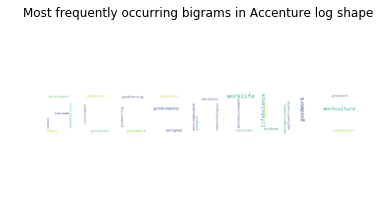

In [360]:
plt.title('Most frequently occurring bigrams in Accenture log shape \n')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


 

In [352]:
wordcloud.to_file('sampleAccentureshape.png')